<a href="https://colab.research.google.com/github/wjdrnqja9/TIL/blob/main/deep_learning/BackToTheBasic_LRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!pip3 install pandas<br>
!pip3 install numpy<br>
!pip3 install matplotlib<br>
!pip3 install statsmodels<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


연속형 임의의 데이터 생성

In [4]:
np.random.seed(0) # 다른 사람과도 매 번 같은 랜덤값

Temperature = np.random.normal(30,3,100)
IceAmericano = Temperature + np.random.normal(100,8,100)
InteriorPrice = np.random.normal(25,2,100)

데이터 프레임 형태로 3개 데이터 합치기<br>

In [5]:
Data = pd.DataFrame({
    'Temp':Temperature,
    'Sales':IceAmericano,
    'InteriorPrice':InteriorPrice
})

In [6]:
Data.head()

,Temp,Sales,InteriorPrice
0,35.292157,150.357363,24.261636
1,31.200472,120.418399,24.521242
2,32.936214,122.772334,27.199319
3,36.722680,144.477853,26.310527
4,35.602674,126.217687,26.280263


Scatter plot으로 데이터 시각화 해보기

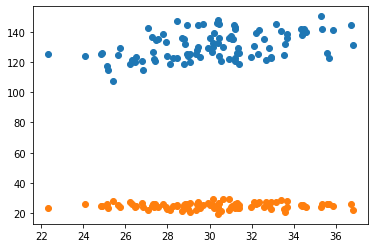

In [7]:
plt.plot(Data['Temp'], Data['Sales'], 'o')
plt.plot(Data['Temp'], Data['InteriorPrice'], 'o')
plt.show()

# 통계 기반 선형모델 학습 시작

선형 regression을 위해, y절편에 해당하는 constant (상수) 추가

In [8]:
import statsmodels.api as sm

InputFeature = Data[ ['Temp', 'InteriorPrice'] ]
InputFeature = sm.add_constant(InputFeature)

print(InputFeature.head())

   const       Temp  InteriorPrice
0    1.0  35.292157      24.261636
1    1.0  31.200472      24.521242
2    1.0  32.936214      27.199319
3    1.0  36.722680      26.310527
4    1.0  35.602674      26.280263


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Linear regression 모델 학습

In [10]:
model = sm.OLS(
    Data['Sales'],
    InputFeature
)

model = model.fit() # QR decomposition 한 번에 최적의 기울기 구함
print(model.params)

const            86.554744
Temp              1.295901
InteriorPrice     0.207835
dtype: float64


# 모델 해석

In [11]:
print( model.summary() )

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     11.31
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           3.84e-05
Time:                        06:11:07   Log-Likelihood:                -352.50
No. Observations:                 100   AIC:                             711.0
Df Residuals:                      97   BIC:                             718.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            86.5547     13.269      6.523

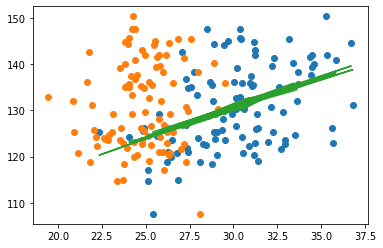

In [12]:
plt.plot(Data['Temp'], Data['Sales'], 'o')
plt.plot(Data['InteriorPrice'], Data['Sales'], 'o')
plt.plot(Data['Temp'], model.predict(InputFeature))
plt.show()